## Análise de Dados

> Para cada arquivo, foram feitas 20 codificações, medindo seus tempos de compressão

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("out.csv")
df

,Arquivo,Tamanho original (bits),Tamanho comprimido (bits),Tamanho Dicionário,Qtd de bits por código,Taxa de compressão,Tempo de compressão (ms),Tempo Relativo (ms/kB)
0,ex (1).txt,144,144,271,9,1.000000,0.421227,23.963136
1,ex (1).txt,144,144,271,9,1.000000,0.332420,18.911004
2,ex (1).txt,144,144,271,9,1.000000,0.983119,55.928548
3,ex (1).txt,144,144,271,9,1.000000,0.363589,20.684174
4,ex (1).txt,144,144,271,9,1.000000,0.293871,16.717995
...,...,...,...,...,...,...,...,...
135,trie.py,99392,38316,3448,12,2.594008,51.574690,4.250844
136,trie.py,99392,38316,3448,12,2.594008,52.923220,4.361991
137,trie.py,99392,38316,3448,12,2.594008,54.921539,4.526695
138,trie.py,99392,38316,3448,12,2.594008,54.346404,4.479292


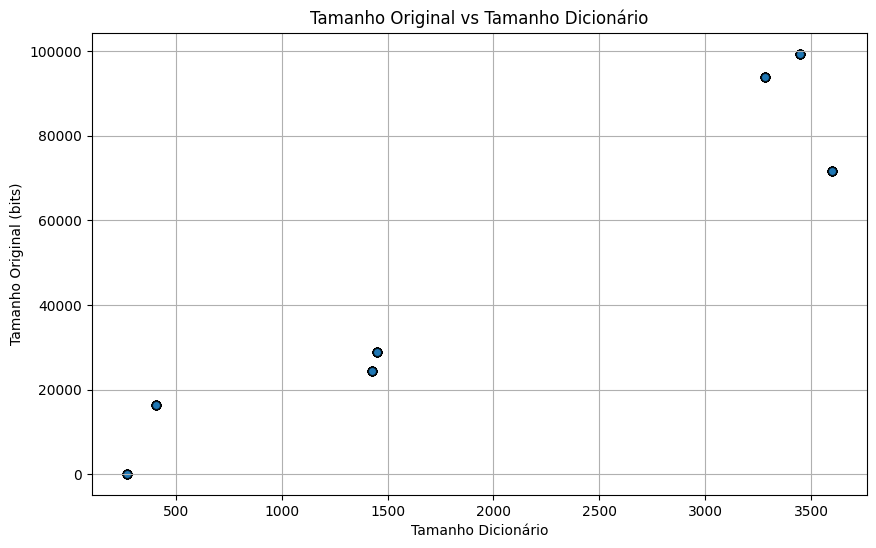

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df["Tamanho Dicionário"],
    df["Tamanho original (bits)"],
    alpha=0.7,
    edgecolors="k",
)
plt.grid(True)
plt.xlabel("Tamanho Dicionário")
plt.ylabel("Tamanho Original (bits)")
plt.title("Tamanho Original vs Tamanho Dicionário")
plt.show()

O tamanho do dicionário tende a crescer linearmente com o tamanho do arquivo de entrada, a codificação ASCII tende a requerer um maior dicionário que a codificação binária.

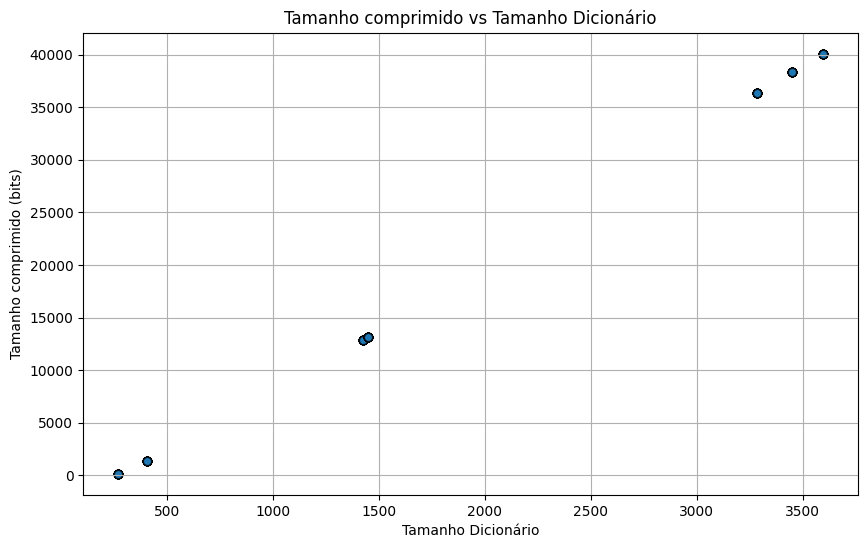

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df["Tamanho Dicionário"],
    df["Tamanho comprimido (bits)"],
    alpha=0.7,
    edgecolors="k",
)
plt.grid(True)
plt.xlabel("Tamanho Dicionário")
plt.ylabel("Tamanho comprimido (bits)")
plt.title("Tamanho comprimido vs Tamanho Dicionário")
plt.show()

Também há um crescimento linear, mas para a saída comprimida, não há grande diferença entre ASCII e binário.

In [5]:
def bootstrap_mean(data, num_samples=10000):
    n = len(data)
    sample_means = np.zeros(num_samples)
    for i in range(num_samples):
        sample = np.random.choice(data, size=n, replace=True)
        sample_means[i] = np.mean(sample)
    return sample_means

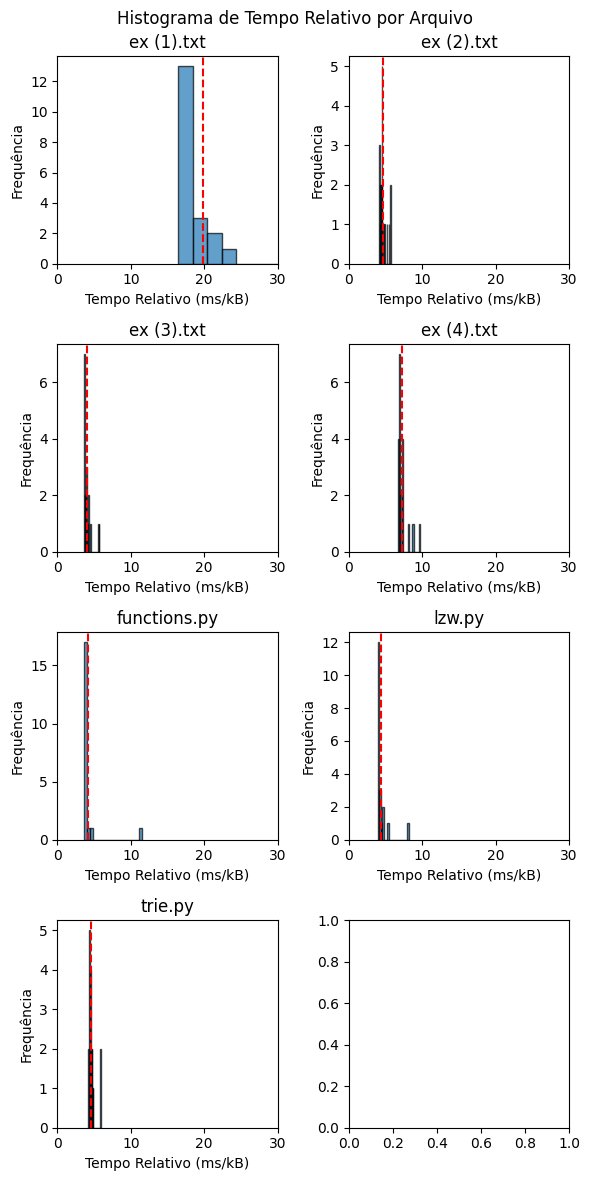

In [6]:
fig, ax = plt.subplots(figsize=(6, 12), ncols=2, nrows=4)
fig.suptitle(f"Histograma de Tempo Relativo por Arquivo")
for i, file in enumerate(df["Arquivo"].unique()):
    time = df.loc[(df["Arquivo"] == file), "Tempo Relativo (ms/kB)"].values
    sample_means = bootstrap_mean(time)
    ax[i // 2, i % 2].hist(time, bins=20, alpha=0.7, edgecolor="k")
    ax[i // 2, i % 2].axvline(np.mean(sample_means), color="r", linestyle="--")
    ax[i // 2, i % 2].set_title(file)
    ax[i // 2, i % 2].set_xlabel("Tempo Relativo (ms/kB)")
    ax[i // 2, i % 2].set_ylabel("Frequência")
    ax[i // 2, i % 2].set_xlim(0, 30)
plt.tight_layout()
plt.show()

Esses são os tempos (ms) relativos ao tamanho do arquivo (kB), que tendem a serem consistentes, exceto alguns casos atípicos, que podem ser atribuídos a forma de medição do tempo.

In [7]:
tempos_relativos = (
    df[
        [
            "Arquivo",
            "Taxa de compressão",
            "Tamanho original (bits)",
            "Tempo Relativo (ms/kB)",
        ]
    ]
    .groupby("Arquivo")
    .mean()
)
tempos_relativos.reset_index(inplace=True)
tempos_relativos

,Arquivo,Taxa de compressão,Tamanho original (bits),Tempo Relativo (ms/kB)
0,ex (1).txt,1.000000,144.0,19.841823
1,ex (2).txt,2.585425,93944.0,4.660409
2,ex (3).txt,1.790083,71768.0,4.049378
3,ex (4).txt,11.921569,16416.0,7.276534
4,functions.py,1.894508,24424.0,4.216108
5,lzw.py,2.209228,29016.0,4.436337
6,trie.py,2.594008,99392.0,4.631007


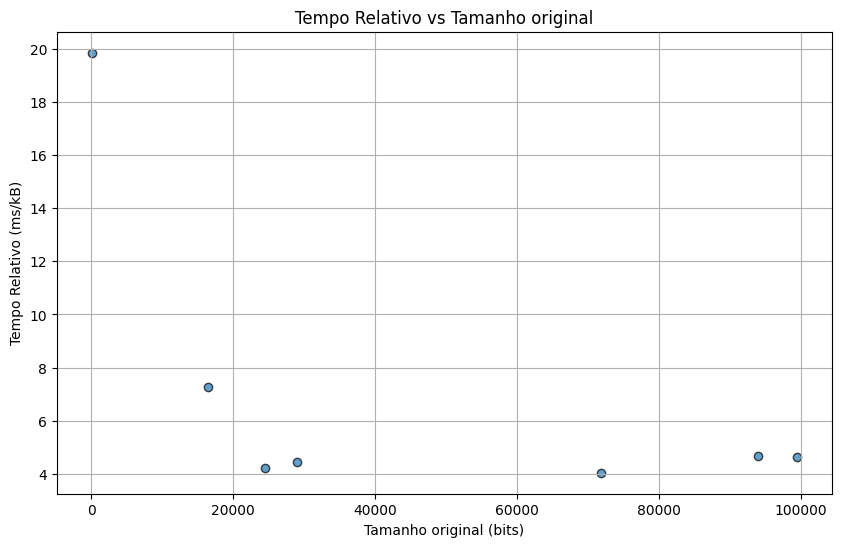

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(
    tempos_relativos["Tamanho original (bits)"],
    tempos_relativos["Tempo Relativo (ms/kB)"],
    alpha=0.7,
    edgecolors="k",
)
plt.grid(True)

plt.xlabel("Tamanho original (bits)")
plt.ylabel("Tempo Relativo (ms/kB)")
plt.title("Tempo Relativo vs Tamanho original")
plt.show()

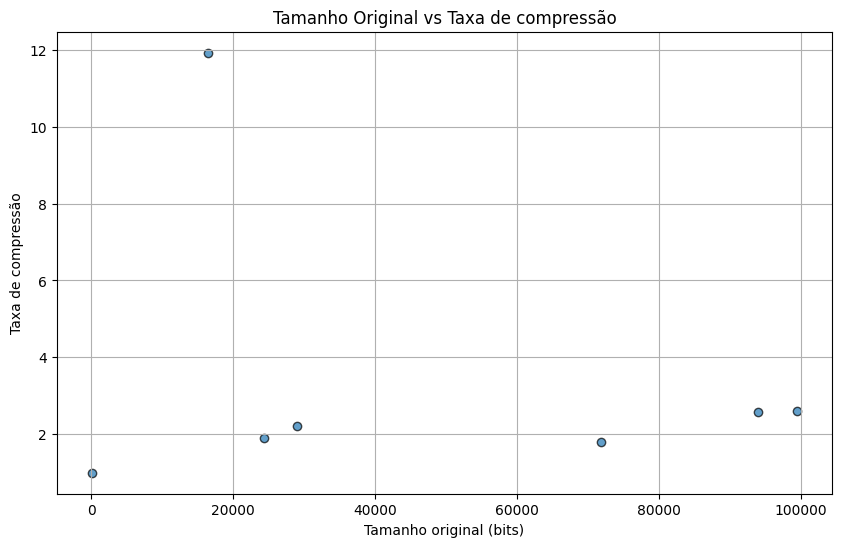

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(
    tempos_relativos["Tamanho original (bits)"],
    tempos_relativos["Taxa de compressão"],
    alpha=0.7,
    edgecolors="k",
)
plt.grid(True)
plt.xlabel("Tamanho original (bits)")
plt.ylabel("Taxa de compressão")
plt.title("Tamanho Original vs Taxa de compressão")
plt.show()